## Final Project 3 Submission

Please fill out:
* Student name: Zhiqiang Sun
* Student pace: self paced
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


# Business problem
SyriaTel Customer Churn (Links to an external site.)
Build a classifier to predict whether a customer will ("soon") stop doing business with SyriaTel, a telecommunications company. Note that this is a binary classification problem.

Most naturally, your audience here would be the telecom business itself, interested in losing money on customers who don't stick around very long. Are there any predictable patterns here?




# Plan
Since the SyriaTel Customer Churn is a binary classification problem problem, I will try to use several different algorithms to fit the data and select one of the best one. The algorithms I will try include Logistic Regression, k-Nearest Neighbors, Decision Trees, Random Forest, Support Vector Machine. 
The target of the data we need to fit is the column 'churn'.
The features of the data is the other columns in dataframe. 
However, when I load the data file into dataframe, i found some of the columns are linear correlated with each other. I need to drop one of them. We need to polish the data first. 

In [2]:
#import all the necessary library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')


In [3]:
df = pd.read_csv('bigml.csv')
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [4]:
# Check the infomation about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

#### Looking at the dataframe, I need to steply polish some features and remove some of the columns: 
1. The pairs of features inclued (total night minutes and total night charges), (total day minutes and total night charges), (total night minutes and total night charges), (total intl charge and total intl minutes) are high correlated with each other. I need to remove one in each columns. 
2. All the phone numbers are unique and act as id. So it should not related to the target. I will remove this feature.
3. The object columns will be catalized. 


In [5]:
# Drop the unique columns and one of each high correlated columns
to_drop = ['state', 'phone number', 'total day minutes', 'total night minutes', 'total night minutes' , 'total intl minutes']
df_polished = df.drop(to_drop, axis = 1)
df_polished.head()

,account length,area code,international plan,voice mail plan,number vmail messages,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night calls,total night charge,total intl calls,total intl charge,customer service calls,churn
0,128,415,no,yes,25,110,45.07,197.4,99,16.78,91,11.01,3,2.70,1,False
1,107,415,no,yes,26,123,27.47,195.5,103,16.62,103,11.45,3,3.70,1,False
2,137,415,no,no,0,114,41.38,121.2,110,10.30,104,7.32,5,3.29,0,False
3,84,408,yes,no,0,71,50.90,61.9,88,5.26,89,8.86,7,1.78,2,False
4,75,415,yes,no,0,113,28.34,148.3,122,12.61,121,8.41,3,2.73,3,False


In [6]:
# The object features need to be catlized
to_cat_1 = [ 'international plan', 'voice mail plan' ]
df_cat = pd.DataFrame()
for col in to_cat_1:
    df_cat = pd.concat([df_cat, pd.get_dummies(df_polished[col], prefix=col, drop_first=True)], axis = 1)
df_cat.head()

,international plan_yes,voice mail plan_yes
0,0,1
1,0,1
2,0,0
3,1,0
4,1,0


In [7]:
df_polished_2 = pd.concat([df_polished, df_cat], axis = 1)

In [8]:
to_drop_2 = ['international plan', 'voice mail plan' , 'international plan', 'voice mail plan' ]
df_polished_3 = df_polished_2.drop(to_drop_2, axis=1)
df_polished_3.columns


Index(['account length', 'area code', 'number vmail messages',
       'total day calls', 'total day charge', 'total eve minutes',
       'total eve calls', 'total eve charge', 'total night calls',
       'total night charge', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn', 'international plan_yes',
       'voice mail plan_yes'],
      dtype='object')

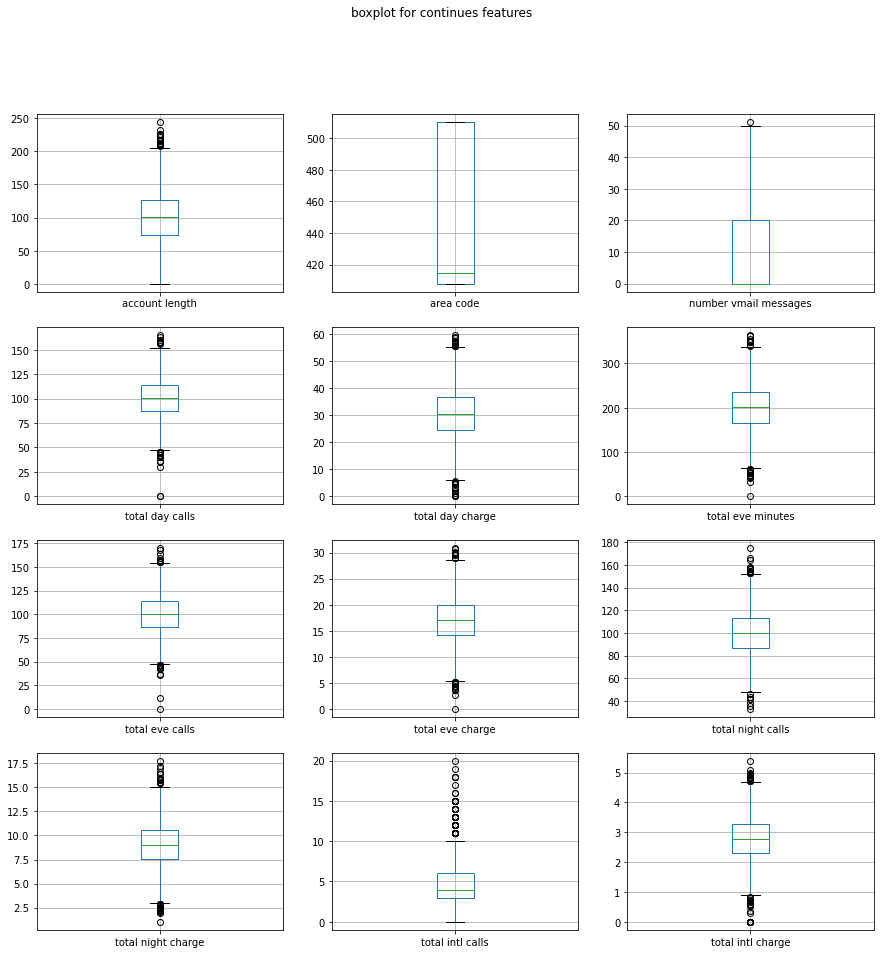

In [9]:
to_plot= ['account length', 'area code', 'number vmail messages', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night calls', 'total night charge', 'total intl calls',
       'total intl charge']
fig, axes = plt.subplots(figsize = (15,15))
fig.suptitle('boxplot for continues features')
for idx, col in enumerate(to_plot):
    
    plt.subplot(4,3,idx+1)
    
    df_polished_3.boxplot(col)

In [10]:
#It looks like most of the frames contain outlier values which may impact our fitting and predicting to the final results. We will try to remove the ouliers.
to_modify = ['account length', 'area code', 'number vmail messages', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night calls', 'total night charge', 'total intl calls',
       'total intl charge']
df_polished_4 = df_polished_3.copy()
for col in to_modify:
    Q1 = df_polished_3[col].quantile(0.25)
    Q3 = df_polished_3[col].quantile(0.75)
    IQR = Q3 - Q1
    df_polished_4 = df_polished_4[(df_polished_3[col] >= Q1 - 1.5*IQR) & (df_polished_3[col] <= Q3 + 1.5*IQR)]


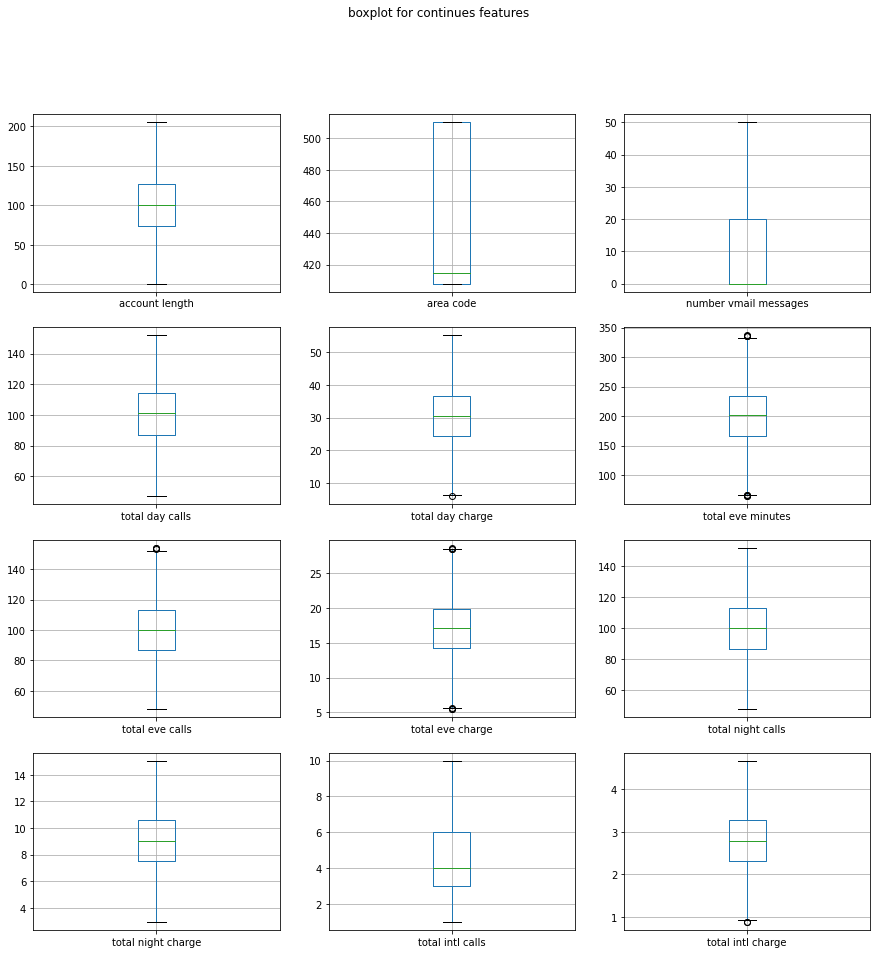

In [11]:
to_plot= ['account length', 'area code', 'number vmail messages', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night calls', 'total night charge', 'total intl calls',
       'total intl charge']
fig, axes = plt.subplots(figsize = (15,15))
fig.suptitle('boxplot for continues features')
for idx, col in enumerate(to_plot):
    
    plt.subplot(4,3,idx+1)
    
    df_polished_4.boxplot(col)

# Now the data was ready and we need to prepare and modeling the data with varies models.

### Plan

#### 1. Perform a Train-Test Split

For a complete end-to-end ML process, we need to create a holdout set that we will use at the very end to evaluate our final model's performance.

#### 2. Build and Evaluate several Model including Logistic Regression, k-Nearest Neighbors, Decision Trees, Randdom forest, Support Vector Machine.
##### For each of the model, we need several steps
    1. Build and Evaluate a base model
    2. Build and Evaluate Additional Logistic Regression Models
    3. Choose and Evaluate a Final Model
#### 3. Compare all the models and find the best model



### 1.  Prepare the Data for Modeling
The target is Cover_Type. In the cell below, split df into X and y, then perform a train-test split with random_state=42 and stratify=y to create variables with the standard X_train, X_test, y_train, y_test names.

In [12]:
y = df_polished_4['churn'] * 1   #extract target and convert from boolen to int type
X = df_polished_4.drop('churn', axis= 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

Since the X features are in different scales, we need to make them to same scale.
Now instantiate a StandardScaler, fit it on X_train, and create new variables X_train_scaled and X_test_scaled containing values transformed with the scaler.

In [13]:

scale = StandardScaler()
scale.fit(X_train)
X_train_scaled = scale.transform(X_train)
X_test_scaled = scale.transform(X_test)

### 2. Build and Evaluate several Model

######  I. Build the model with Logistic Regression

In [14]:
# Instantiate a LogisticRegression with random_state=42
Log = LogisticRegression(random_state=42)
a = Log.fit(X_train, y_train)
print (round(Log.score(X_train_scaled, y_train), 5))
print (round(Log.score(X_test_scaled, y_test), 5))


0.62997
0.64267


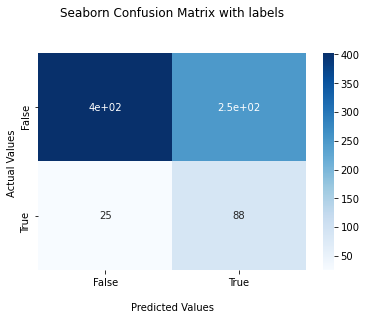

In [15]:
y_hat_test = Log.predict(X_test_scaled)



cf_matrix  = confusion_matrix(y_test,y_hat_test)

# make the plot of cufusion matrix 
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

The score for LogisticRegression is not very high. It is just above the random guessing. The false positive and false negtive rate are very high.

######  II. Build the model with  k-Nearest Neighbors

In [16]:
# For k-Nearest Neighbors, I first build the base line model
knn_base = KNeighborsClassifier()
knn_base.fit(X_train_scaled, y_train)
print (round(knn_base.score(X_train_scaled, y_train),5))
print (round(knn_base.score(X_test_scaled, y_test),5))



0.90782
0.88874


The scores for KNeighborsClassifier are pretty high. But the score for traing is higher than testing data. We will try to use other parameter to find the best number of neighbor used for fitting.

In [17]:
#set the list of n_neighbors we will try
knn_param_grid = {
    'n_neighbors' : [1,3,5,6,7,8,9, 10]
}
knn_param_grid =  GridSearchCV(knn_base, knn_param_grid, cv=3, return_train_score=True)

In [18]:
#fit the model to data
knn_param_grid.fit(X_train_scaled, y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 3, 5, 6, 7, 8, 9, 10]},
             return_train_score=True)

In [19]:
# find the best parameter
knn_param_grid.best_estimator_

KNeighborsClassifier(n_neighbors=7)

In [20]:
# fit the data with best estimator
knn_base_best = KNeighborsClassifier(n_neighbors=7)
knn_base_best.fit(X_train_scaled, y_train)
print (round(knn_base_best.score(X_train_scaled, y_train),5))
print (round(knn_base_best.score(X_test_scaled, y_test),5))


0.90083
0.88351


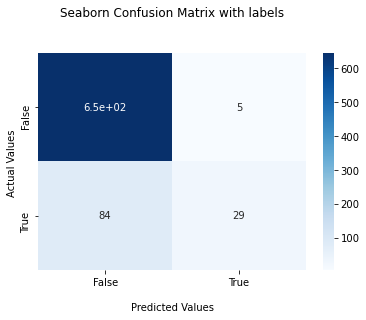

In [21]:
y_hat_test = knn_base_best.predict(X_test_scaled)



cf_matrix  = confusion_matrix(y_test,y_hat_test)

# make the plot of cufusion matrix 
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

Compare to the baseline model, even though the training score decreased, the testing score increased. However, the confusion matrix showed there are a lot of false negtive. 

######  III. Build the model with Decision Trees

In [22]:
# set the baseline model for DecisionTreeClassifier
DT_baseline = DecisionTreeClassifier(random_state=42)
DT_baseline.fit(X_train_scaled, y_train)
print (round(DT_baseline.score(X_train_scaled, y_train),5))
print (round(DT_baseline.score(X_test_scaled, y_test),5))


1.0
0.90314


The scores for DecisionTreeClassifier are very high even 100% for trainning data. However, the score for testing is only 90% which suggest the DT_baseline is overfitting.

In [23]:
#set the list of parameters we will try

dt_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 3, 4, 5 , 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf' : [1, 2, 3, 4, 5, 6]
}
dt_grid_search =  GridSearchCV(DT_baseline, dt_param_grid, cv=3, return_train_score=True)

# Fit to the data
dt_grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 10],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6],
                         'min_samples_split': [2, 5, 10]},
             return_train_score=True)

In [24]:
# find best parameters
dt_grid_search.best_params_


{'criterion': 'gini',
 'max_depth': 10,
 'min_samples_leaf': 6,
 'min_samples_split': 2}

In [25]:
# refit the model to data with best parameters
DT_baseline_best = DecisionTreeClassifier(random_state=42, criterion='entropy', max_depth=10,
                                          min_samples_leaf=6, min_samples_split=2)
DT_baseline_best.fit(X_train_scaled, y_train)
print (round(DT_baseline_best.score(X_train_scaled, y_train),5))
print (round(DT_baseline_best.score(X_test_scaled, y_test),5))

0.96461
0.95026


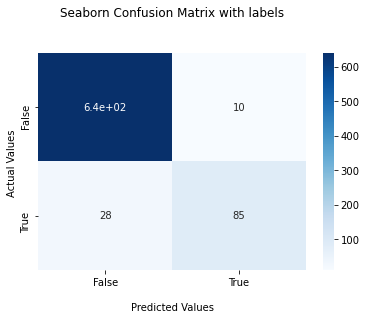

In [26]:
y_hat_test = DT_baseline_best.predict(X_test_scaled)



cf_matrix  = confusion_matrix(y_test,y_hat_test)

# make the plot of cufusion matrix 
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

Compare to the DT baseline model, even though the training score decreased, the testing score increased. Now the two scores are close to each other and both of them are very high. 

######  IV. Build the model with  Support Vector Machine

In [27]:
# set the baseline model for Support Vector Machine
svm_baseline = SVC()
svm_baseline.fit(X_train_scaled, y_train)
print (round(svm_baseline.score(X_train_scaled, y_train),5))
print (round(svm_baseline.score(X_test_scaled, y_test),5))



0.93578
0.90707


In [28]:
#set the list of parameters we will try

svm_param_grid = {
    'C' :[0.1, 1, 5, 10, 100],
    'kernel': ['poly', 'rbf'],
    'gamma': [0.1, 1, 10, 'auto'],
    

}
svm_grid_search =  GridSearchCV(svm_baseline, svm_param_grid, cv=3, return_train_score=True)

svm_grid_search.fit( X_train_scaled, y_train)

GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [0.1, 1, 5, 10, 100],
                         'gamma': [0.1, 1, 10, 'auto'],
                         'kernel': ['poly', 'rbf']},
             return_train_score=True)

In [29]:
# find best parameters

svm_grid_search.best_params_


{'C': 5, 'gamma': 'auto', 'kernel': 'rbf'}

In [30]:
# refit the model to data with best parameters

svm_baseline_best = SVC(C= 1, gamma= 'auto', kernel= 'rbf')
svm_baseline_best.fit(X_train_scaled, y_train)
print (round(svm_baseline_best.score(X_train_scaled, y_train),5))
print (round(svm_baseline_best.score(X_test_scaled, y_test),5))

0.93578
0.90707


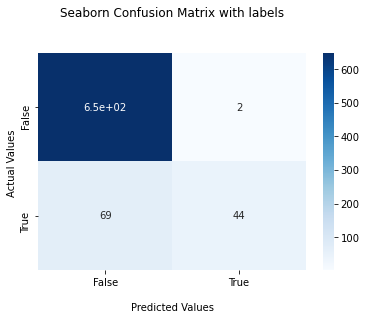

In [31]:
y_hat_test = svm_baseline_best.predict(X_test_scaled)



cf_matrix  = confusion_matrix(y_test,y_hat_test)

# make the plot of cufusion matrix 
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

Compare to the SVC baseline model, the training score decreased, the testing score is not changing. They are pretty high but still less than DT model. The False negtive rate for this model is also very high.

######  V. Build the model with RandomForestClassifier

In [32]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train_scaled, y_train)
print (round(rf_clf.score(X_train_scaled, y_train),5))
print (round(rf_clf.score(X_test_scaled, y_test),5))

1.0
0.94503


In [33]:
rf_param_grid = {
    'n_estimators' : [10, 30, 100],
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [None, 2, 6, 10],
    'min_samples_split' : [5, 10],
    'min_samples_leaf' : [3, 6],
    
}
rf_grid_search = GridSearchCV(rf_clf, rf_param_grid, cv =3)

rf_grid_search.fit(X_train, y_train)
print("")
print(f"Optimal Parameters: {rf_grid_search.best_params_}")


Optimal Parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 30}


In [34]:
rf_clf_best = RandomForestClassifier(criterion='gini', max_depth=10, min_samples_leaf=3, min_samples_split=10, n_estimators = 30)
rf_clf_best.fit(X_train_scaled, y_train)
print (round(rf_clf_best.score(X_train_scaled, y_train),5))
print (round(rf_clf_best.score(X_test_scaled, y_test),5))

0.96505
0.92539


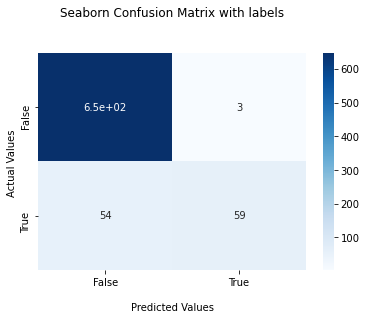

In [35]:
y_hat_test = rf_clf_best.predict(X_test_scaled)



cf_matrix  = confusion_matrix(y_test,y_hat_test)

# make the plot of cufusion matrix 
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

 #### Compare all the models and find the best model, then evaluate it.

In [36]:
# When comparing the final score for training and testing data, the decision tree model give us best results. 
# I make this model to the final one.
DT_baseline_final = DecisionTreeClassifier(random_state=42, criterion='entropy', max_depth=10,
                                          min_samples_leaf=6, min_samples_split=2)
DT_baseline_final.fit(X_train_scaled, y_train)
print (round(DT_baseline_final.score(X_train_scaled, y_train), 5))
print (round(DT_baseline_final.score(X_test_scaled, y_test), 5))

0.96461
0.95026


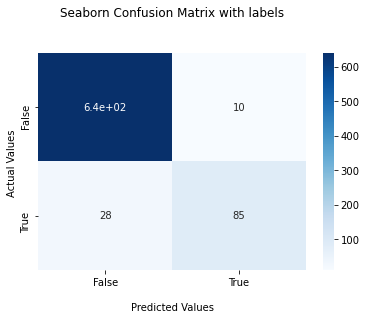

In [37]:
# make the cufusion box for final model and plot it
y_hat_test = DT_baseline_final.predict(X_test_scaled)



cf_matrix  = confusion_matrix(y_test,y_hat_test)

# make the plot of cufusion matrix 
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

 The final score for training and testing data are very high and close to each other which suggest there is no overfit or downfit to the trainning data. Now let find out the weight of each features to the target results. 

Feature: account length ,    Score: 0.01396
Feature: area code ,    Score: 0.00536
Feature: number vmail messages ,    Score: 0.00381
Feature: total day calls ,    Score: 0.01465
Feature: total day charge ,    Score: 0.26170
Feature: total eve minutes ,    Score: 0.05911
Feature: total eve calls ,    Score: 0.02410
Feature: total eve charge ,    Score: 0.08361
Feature: total night calls ,    Score: 0.00912
Feature: total night charge ,    Score: 0.05405
Feature: total intl calls ,    Score: 0.08132
Feature: total intl charge ,    Score: 0.08538
Feature: customer service calls ,    Score: 0.14691
Feature: international plan_yes ,    Score: 0.10091
Feature: voice mail plan_yes ,    Score: 0.05603


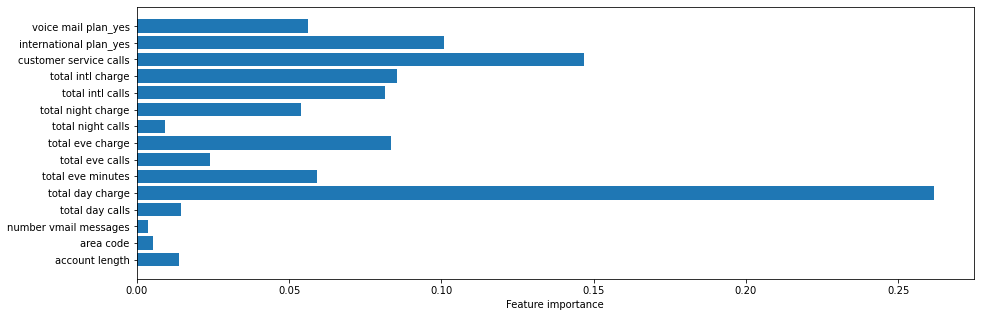

In [38]:
importance_DT = DT_baseline_best.feature_importances_
# summarize feature importance
for i,v in zip(X_train.columns, importance_DT):
    print('Feature: {0} ,    Score: {1:0.5f}'.format (i,v))
# plot feature importance
plt.figure(figsize = (15, 5))
plt.barh(X_train.columns, importance_DT,  align='center')
plt.xlabel('Feature importance')

plt.show()

Find the top 5 important features.

In [39]:
top_5 =np.sort(DT_baseline_final.feature_importances_
       )[: :-1][0:5]
top_5_features = []
for sor in top_5:    
    for idx, num in zip(X.columns, importance_DT):
        #print(idx, num)
        if num == sor:
            top_5_features.append((idx, num))
            pass
top_5_features

[('total day charge', 0.26169763518771966),
 ('customer service calls', 0.1469102061483546),
 ('international plan_yes', 0.1009100150705904),
 ('total intl charge', 0.08537600988682308),
 ('total eve charge', 0.08360637737007212)]

### Check if there is special patten for the top five important features

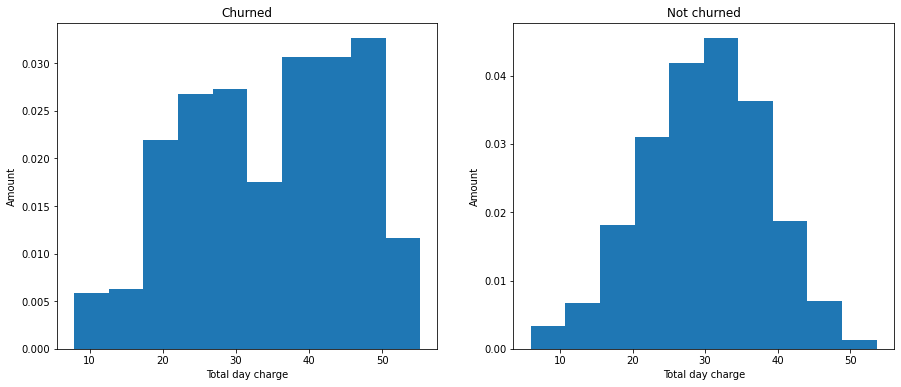

In [40]:
# Plot the histogram for total day charge of customers who churned and not churned.
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.hist(df_polished_4[df_polished_4['churn'] == 1]['total day charge'], density=True)
plt.xlabel('Total day charge')
plt.ylabel('Amount')
plt.title('Churned')


plt.subplot(1,2,2)
plt.hist(df_polished_4[df_polished_4['churn'] == 0]['total day charge'], density=True)
plt.xlabel('Total day charge')
plt.ylabel('Amount')
plt.title('Not churned')
plt.show()

The histograms for customers who churned and not churned show that the total day chare have a lot of overlap with each other.The customers who had total day charg more than 40 have more chance to churn the plan. 

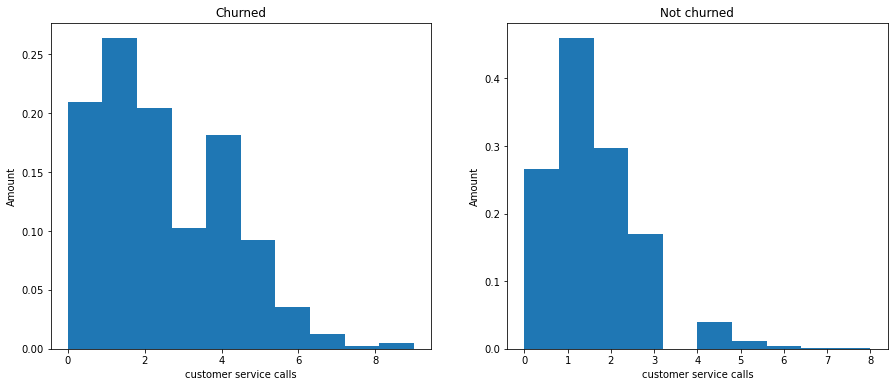

In [41]:
# Plot the histogram for 'customer service calls' of customers who churned and not churned.

plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.hist(df_polished_4[df_polished_4['churn'] == 1]['customer service calls'],  density=True)
plt.xlabel('customer service calls')

plt.ylabel('Amount')
plt.title('Churned')
plt.subplot(1,2,2)
plt.hist(df_polished_4[df_polished_4['churn'] == 0]['customer service calls'],  density=True)
plt.xlabel('customer service calls')
plt.ylabel('Amount')
plt.title('Not churned')
plt.show()

The histogram are similar to each other. However, the customer who had 4 international calls had  higher chance to churn the plan. 

In [42]:
# Since the column 'international plan_yes' contains only 0 and 1. I plot the value counts for bot churned and not churned.
print('not churned ', ' \n' ,df_polished_4[df_polished_4['churn'] == 0]['international plan_yes'].value_counts())
print ('churned', '\n', df_polished_4[df_polished_4['churn'] == 1]['international plan_yes'].value_counts())

not churned   
 0    2446
1     173
Name: international plan_yes, dtype: int64
churned 
 0    313
1    121
Name: international plan_yes, dtype: int64


This data show that the customer who had international plan have much higher chance to churn the plan. 

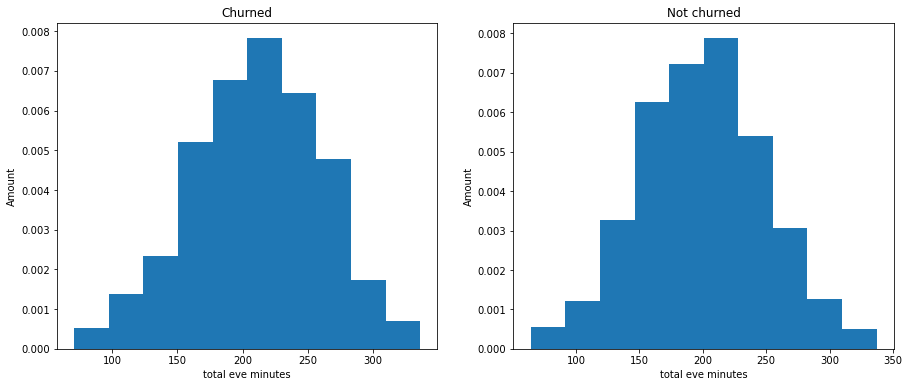

In [44]:
# Plot the histogram for 'total eve minutes' of customers who churned and not churned.

plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.hist(df_polished_4[df_polished_4['churn'] == 1]['total eve minutes'], density=True)
plt.xlabel('total eve minutes')
plt.ylabel('Amount')
plt.title('Churned')

plt.subplot(1,2,2)
plt.hist(df_polished_4[df_polished_4['churn'] == 0]['total eve minutes'], density=True)
plt.xlabel('total eve minutes')
plt.ylabel('Amount')
plt.title('Not churned')
plt.show()

There is no clear relationship between total eve minutes and churn or not.

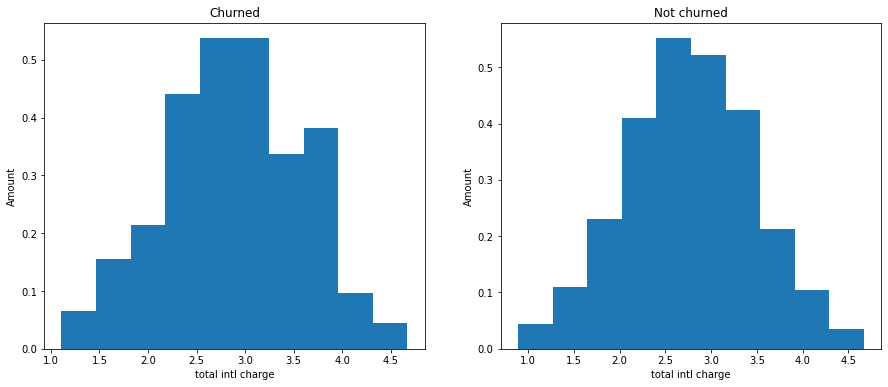

In [45]:
# Plot the histogram for 'total intl charge' of customers who churned and not churned.

plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.hist(df_polished_4[df_polished_4['churn'] == 1]['total intl charge'], density=True)
plt.xlabel('total intl charge')
plt.ylabel('Amount')
plt.title('Churned')
plt.subplot(1,2,2)
plt.hist(df_polished_4[df_polished_4['churn'] == 0]['total intl charge'], density=True)
plt.xlabel('total intl charge')
plt.ylabel('Amount')
plt.title('Not churned')
plt.show()

There is no clear relationship between total intl charge and churn or not.

# Conclusion

We polished our original data by removing the outlier and catalyzed the necessary columns. We then tested several of models to fit out data and selected the best one which is decision tree. The final score of predicting is 0.94 which is very high. By dig out the relation ship between the top 5 weighted features and target column (churn), we found that people who had day charge more than 40 or had customer service calls 4 and more, or had international plan had higher chance to churn the plan. So the company might focus on these customers and make some special promotions on these plan to attract more customer on them.

